## Brain Tumour Detection model using XGBoost Classifier:

In [2]:
# Importing required Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

In [3]:
# Reading the dataset:
df = pd.read_csv('Zernike_Moments_YN_3000.csv', header=None)

In [4]:
# Top 5 records:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,280,281,282,283,284,285,286,287,288,289
0,0.31831,0.015644,0.010536,0.042117,0.017535,0.034433,0.009973,0.008258,0.012691,0.012026,...,0.016006,0.021341,0.017135,0.018174,0.022102,0.016517,0.017490,0.022149,0.021471,YES
1,0.31831,0.063213,0.049919,0.044137,0.031334,0.025834,0.001331,0.015558,0.024625,0.016563,...,0.019096,0.033980,0.035784,0.021241,0.035250,0.022237,0.039646,0.024342,0.023165,YES
2,0.31831,0.028668,0.088893,0.028020,0.045784,0.133713,0.044890,0.072025,0.047966,0.016014,...,0.019219,0.018691,0.016470,0.024290,0.009614,0.031743,0.021006,0.024585,0.009463,YES
3,0.31831,0.023085,0.007676,0.024351,0.040146,0.051798,0.010815,0.034136,0.021390,0.014092,...,0.008116,0.009317,0.014892,0.009398,0.016637,0.012476,0.015538,0.012200,0.018557,YES
4,0.31831,0.059796,0.031397,0.031870,0.037461,0.036331,0.009391,0.015493,0.048725,0.028333,...,0.010167,0.021948,0.009159,0.034622,0.008190,0.019209,0.011622,0.021005,0.019137,YES


In [5]:
# Finding the number of row and Columns:
df.shape

(2759, 290)

In [6]:
# Target data:
df[289].value_counts()

YES    1654
NO     1105
Name: 289, dtype: int64

In [7]:
# To determine how many patients have Brain Tumour and how many do not(Target data):
print(round(df[289].value_counts()[1]/len(df) * 100,2), '% of the patients who has Brain Tumour.')
print(round(df[289].value_counts()[0]/len(df) * 100,2), '% of the patients who do not have Brain Tumour.')

40.05 % of the patients who has Brain Tumour.
59.95 % of the patients who do not have Brain Tumour.


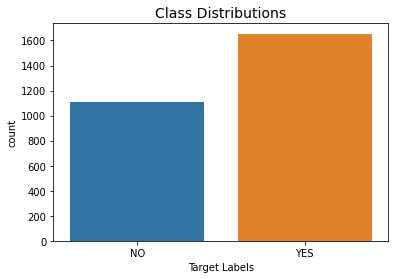

In [12]:
# Plotting the target distribution:
sns.countplot(x = df[289])
plt.title('Class Distributions', fontsize=14)
plt.xlabel("Target Labels")
plt.show()

In [13]:
# Shuffling the whole dataset:
df = df.sample(frac=1, random_state=0).reset_index(drop=True)

In [14]:
# After shuffling:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,280,281,282,283,284,285,286,287,288,289
0,0.31831,0.064067,0.042367,0.005077,0.039959,0.010307,0.027563,0.034909,0.042161,0.018338,...,0.005150,0.013605,0.008290,0.017326,0.006544,0.023263,0.009479,0.023641,0.002712,YES
1,0.31831,0.014379,0.000807,0.016390,0.022824,0.018037,0.004036,0.010298,0.009965,0.007081,...,0.008874,0.016426,0.012125,0.016484,0.029179,0.023153,0.007061,0.023218,0.014724,YES
2,0.31831,0.020845,0.006160,0.040001,0.045641,0.021972,0.006688,0.047572,0.016864,0.016121,...,0.021640,0.003987,0.027176,0.002590,0.020176,0.008430,0.024794,0.013997,0.015981,NO
3,0.31831,0.040331,0.049170,0.042343,0.064064,0.021439,0.017889,0.038743,0.045333,0.035196,...,0.018406,0.020172,0.023955,0.027186,0.020050,0.004814,0.008993,0.004951,0.011462,NO
4,0.31831,0.078757,0.016181,0.043099,0.055235,0.023934,0.029088,0.021532,0.025430,0.034184,...,0.020074,0.030983,0.022591,0.034327,0.017488,0.019548,0.035094,0.026571,0.017945,YES


In [15]:
# Converting categorical values of Target feature into numerical:
df[289].replace(['YES','NO'], [1,0], inplace=True)

In [16]:
# After Converting Target feature to numerical:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,280,281,282,283,284,285,286,287,288,289
0,0.31831,0.064067,0.042367,0.005077,0.039959,0.010307,0.027563,0.034909,0.042161,0.018338,...,0.005150,0.013605,0.008290,0.017326,0.006544,0.023263,0.009479,0.023641,0.002712,1
1,0.31831,0.014379,0.000807,0.016390,0.022824,0.018037,0.004036,0.010298,0.009965,0.007081,...,0.008874,0.016426,0.012125,0.016484,0.029179,0.023153,0.007061,0.023218,0.014724,1
2,0.31831,0.020845,0.006160,0.040001,0.045641,0.021972,0.006688,0.047572,0.016864,0.016121,...,0.021640,0.003987,0.027176,0.002590,0.020176,0.008430,0.024794,0.013997,0.015981,0
3,0.31831,0.040331,0.049170,0.042343,0.064064,0.021439,0.017889,0.038743,0.045333,0.035196,...,0.018406,0.020172,0.023955,0.027186,0.020050,0.004814,0.008993,0.004951,0.011462,0
4,0.31831,0.078757,0.016181,0.043099,0.055235,0.023934,0.029088,0.021532,0.025430,0.034184,...,0.020074,0.030983,0.022591,0.034327,0.017488,0.019548,0.035094,0.026571,0.017945,1


In [17]:
# Splitting into Independent and Dependent features:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [18]:
# Train-Test spilt:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [19]:
# Printing the shape after train-test split:
print(x_train.shape)
print(x_test.shape)

(2207, 289)
(552, 289)


## XGBoost Classifier:

In [20]:
# Creating an Object of XGBoost Classifier:
xgb = XGBClassifier()

In [22]:
# Fitting the Training data:
xgb.fit(x_train, y_train)

[11:51:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [23]:
# Predicting the test data:
y_pred = xgb.predict(x_test)

### Results:

In [24]:
print("Accuracy :", round(accuracy_score(y_test, y_pred), 2)*100, "%")

Accuracy : 97.0 %


In [25]:
print("Precision :", round(precision_score(y_test, y_pred), 2)*100, "%")

Precision : 98.0 %


In [26]:
print("Recall :", round(recall_score(y_test, y_pred), 2)*100, "%")

Recall : 97.0 %


In [27]:
print("f1_Score :", round(f1_score(y_test, y_pred), 2)*100, "%")

f1_Score : 98.0 %


In [28]:
print("Confusion Matrix :")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix :
[[190   7]
 [  9 346]]


In [29]:
print("Classification Report :")
print(classification_report(y_test, y_pred))

Classification Report :
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       197
           1       0.98      0.97      0.98       355

    accuracy                           0.97       552
   macro avg       0.97      0.97      0.97       552
weighted avg       0.97      0.97      0.97       552

